Please fill in your name and that of your teammate.

You: **Ahonon Gobi Parfait**

Teammate: (No one available)

# Introduction

Welcome to the tenth lab. Neural networks are more a class of tools than a single tool, though the foundation you built last week should enable you to understand what is going on here without too much trouble.

There is relatively little coding this week, which is unfortunate: we are starting to touch topics that require more than a lab's worth of practice to achieve basic proficiency. Rather than overloading you of work, this week we focus a bit more on foundations and give you time to study; then we should hit more interesting and fun applications over the next lectures with Deep Learning and Reinforcement Learning.

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pt]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 14 points (out of 21 available) to pass** (66%).

# 1. Fundamentals

#### 1.1 **[1pt]** Explain in English what is the distinctive feature of a residual network.

The **distinctive feature of a residual network (ResNet)** is the use of skip connections, also known as shortcut connections or residual connections. These connections allow information from earlier layers to bypass several layers and directly connect to deeper layers in the network. By doing so, ResNet addresses the degradation problem encountered in deep neural networks, where adding more layers can lead to decreased performance due to vanishing gradients or the difficulty of training deeper networks. The skip connections in ResNet enable the network to learn residual functions, which are easier to optimize compared to directly learning the underlying mapping. This architecture facilitates the training of very deep networks (hundreds or even thousands of layers) while maintaining or even improving performance.

#### 1.2 **[2pt]** Write the full equation of a network with structure [2, 4, 1] (same as last week), but this time add (i) biases on all neurons, and (ii) self-recurrent connections only on the hidden layer. How many weights does this network have?

- I would suggest starting from your answer from last week, fixing it based on the solution if you need to and have not already, then add what you need.
- To avoid changing the indices of the weights, you can simply call bias weights $b$ rather than $w$, and recurrent connections $r$.
- The main thing to remember is: each line has the weights entering one destination neuron, and each column refers to one of the inputs to the layer.
- Then for a recurrent network, remember to pass the output of all neurons of the same layer (technically representing the previous-step activations, initialized as `0`s) as inputs to each neuron.

The network has three layers:
- An input layer (no neurons!) with two elements $(x_1, x_2)$
- One hidden layer composed of four neurons $(n_1, n_2, n_3, n_4)$
- The output layer with only one neuron $(n_5)$

We will need to add biases and recurrencies this time: it could be helpful to describe the inputs/outputs for each layer together with the weight matrix. 
- $X$ is the network input, same as before
- Then come the recurrent connections: all the outputs of the neurons of the hidden layer, technically from the previous time step (initialize as zeros)
- Finally the bias input, the constant 1 that will be multiplied by the bias weight
- $X_{hid}$ is the actual full input to the hidden (and first) layer: all three above
- $W_h$ is the weight matrix for ALL the connections entering the hidden layer in the columns, while the rows group the connections entering each neuron
- The output can be written with $n_i$ same as we did last time; the don't forget you will need the bias also for the output layer (but no recursion!)
- You can call $X_{out}$ the input to the output (and second) layer, and $W_{out}$ its weight matrix.
And do not underestimate the value of a quick sketch on a piece of paper! Or head to [draw.io](https://draw.io) if you want a computer drawing that is easy, quick and professional looking.

Remember that the output can be interpreted as one scalar, but is in principle a vector with one element (because having only one output is a special case, normally you need a list of outputs here).

Let us first, find out X, Xhid, Whid: 

$$X=\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}$$
$$ Xhid = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix}$$

$$
W_{in} = \begin{pmatrix} 
w_{1} & w_{2} & b_{1} \\
w_{3} & w_{4} & b_{2} \\
w_{5} & w_{6} & b_{3} \\
w_{7} & w_{8} & b_{4} \\
r_{3} & r_{4} & b_{5} \\
\end{pmatrix}$$

$$  
Whid = \begin{pmatrix}
w_{9} & w_{10} & w_{11} & w_{12} \\
r_{1} & r_{2} & r_{3} & r_{4} \\
b_{1} & b_{2} & b_{3} & b_{4} \\
\end{pmatrix} 
$$
$$X_{out} = \begin{pmatrix} n_5 \end{pmatrix}$$
$$W_{out} = \begin{pmatrix} w_{1} & w_{2} & w_{3} & w_{4} & b \end{pmatrix}$$

$$nhid = \sigma(Win*X) = \begin{pmatrix} \sigma(w_{1}*x_1 + w_{2}*x_2 + b_{1}) \\ \sigma(w_{3}*x_1 + w_{4}*x_2 + b_{2}) \\ \sigma(w_{5}*x_1 + w_{6}*x_2 + b_{3}) \\ \sigma(w_{7}*x_1 + w_{8}*x_2 + b_{4}) \end{pmatrix}$$

$$
nout = \sigma(w_hid*n_hid) \\=  \sigma(w_{9}*n_1 + w_{10}*n_2 + w_{11}*n_3 + w_{12}*n_4 + b)
\\ = \sigma(w_{9}*\sigma(w_{1}*x_1 + w_{2}*x_2 + b_{1}) + w_{10}*\sigma(w_{3}*x_1 
+ w_{4}*x_2 + b_{2}) + w_{11}*\sigma(w_{5}*x_1 + w_{6}*x_2 + b_{3}) + w_{12}*\sigma(w_{7}*x_1 + w_{8}*x_2 + b_{4}) + b)

$$



#### 1.3 **[2pt]** A neural network has only one layer of two convolutional neurons with identity activation. Below you will find respective kernels $W_1$ and $W_2$ and input $X$. Activate the network on the input by hand showing all calculation. Assume no padding and state explicitly the expected output size.

It's easier to understand what you need to explain about your calculations if you actually start doing them :) just mark what you actually input in the calculator, what the calculator returns, and what calculation you are confident skipping.

$$
W_1 = 
\begin{pmatrix}
-1 & -1 & -1 \\
 2 &  2 &  2 \\
-1 & -1 & -1
\end{pmatrix}
\quad,\quad
W_2 = 
\begin{pmatrix}
-1 & 2 & -1 \\
-1 & 2 & -1 \\
-1 & 2 & -1
\end{pmatrix}
\\
X = 
\begin{pmatrix}
2 & 2 & 2 & 2 & 2 \\
3 & 3 & 3 & 3 & 3 \\
1 & 1 & 1 & 1 & 1 \\
3 & 3 & 3 & 3 & 3 \\
2 & 2 & 2 & 2 & 2 
\end{pmatrix}
$$

Given the input matrix \( X \) of size \( 5 \times 5 \) and the kernels \( W_1 \) and \( W_2 \) of size \( 3 \times 3 \), the output will be of size \( (5-3+1) \times (5-3+1) = 3 \times 3 \) for each kernel.  
Let's perform the convolution operation for the first kernel \( W_1 \) for \( h \) at position \( (0,0) \): 

\[
\begin{align*}
&\begin{pmatrix}
-1 & -1 & -1 \\
2 & 2 & 2 \\
-1 & -1 & -1
\end{pmatrix} \circledast \begin{pmatrix}
2 & 2 & 2 \\
3 & 3 & 3 \\
1 & 1 & 1
\end{pmatrix} \\
&= -1 \times 2 + -1 \times 2 + -1 \times 2 + 2 \times 3 + 2 \times 3 + 2 \times 3 + -1 \times 1 + -1 \times 1 + -1 \times 1 \\
&= -2 - 2 - 2 + 6 + 6 + 6 - 1 - 1 - 1 \\
&= 9
\end{align*}
\]

Now, let's perform the convolution operation for the second kernel \( W_2 \) for \( h \) at position \( (0,0) \):

\[
\begin{align*}
&\begin{pmatrix}
-1 & 2 & -1 \\
-1 & 2 & -1 \\
-1 & 2 & -1
\end{pmatrix} \circledast \begin{pmatrix}
2 & 2 & 2 \\
3 & 3 & 3 \\
1 & 1 & 1
\end{pmatrix} \\
&= -1 \times 2 + 2 \times 2 + -1 \times 2 + -1 \times 3 + 2 \times 3 + -1 \times 3 + -1 \times 1 + 2 \times 1 + -1 \times 1 \\
&= -2 + 4 - 2 - 3 + 6 - 3 - 1 + 2 - 1 \\
&= 0
\end{align*}
\]

Now let us perform the convolution operation for the first kernel \( W_1 \) for \( h \) at position \( (0,1) \):

\[
\begin{align*}
&\begin{pmatrix}
-1 & -1 & -1 \\
2 & 2 & 2 \\
-1 & -1 & -1
\end{pmatrix} \circledast \begin{pmatrix}
2 & 2 & 2 \\
3 & 3 & 3 \\
1 & 1 & 1
\end{pmatrix} \\
&= -1 \times 2 + -1 \times 2 + -1 \times 2 + 2 \times 3 + 2 \times 3 + 2 \times 3 + -1 \times 1 + -1 \times 1 + -1 \times 1 \\
&= -2 - 2 - 2 + 6 + 6 + 6 - 1 - 1 - 1 \\
&= 9
\end{align*}
\]

Now let us perform the convolution operation for the second kernel \( W_2 \) for \( h \) at position \( (0,1) \):

\[
\begin{align*}
&\begin{pmatrix}
-1 & 2 & -1 \\
-1 & 2 & -1 \\
-1 & 2 & -1
\end{pmatrix} \circledast \begin{pmatrix}
2 & 2 & 2 \\
3 & 3 & 3 \\
1 & 1 & 1
\end{pmatrix} \\
&= -1 \times 2 + 2 \times 2 + -1 \times 2 + -1 \times 3 + 2 \times 3 + -1 \times 3 + -1 \times 1 + 2 \times 1 + -1 \times 1 \\
&= -2 + 4 - 2 - 3 + 6 - 3 - 1 + 2 - 1 \\
&= 0
\end{align*}
\]

Position \( (0,2) \) for \( W_1 \) and \( W_2 \) will be 9 and 0 respectively.

Position \( (1,0) \) for \( W_1 \): 
\[
\begin{align*}
&\begin{pmatrix}
-1 & -1 & -1 \\
2 & 2 & 2 \\
-1 & -1 & -1
\end{pmatrix} \circledast \begin{pmatrix}
3 & 3 & 3 \\
1 & 1 & 1 \\
3 & 3 & 3
\end{pmatrix} \\
&= -1 \times 3 + -1 \times 3 + -1 \times 3 + 2 \times 1 + 2 \times 1 + 2 \times 1 + -1 \times 3 + -1 \times 3 + -1 \times 3 \\
&= -3 - 3 - 3 + 2 + 2 + 2 - 3 - 3 - 3 \\
&= -12
\end{align*}
\]
** Same for Position \( (1,1) \) and \( (1,2) \) for \( W_1 \). **

Position \( (1,0) \) for \( W_2 \):

\[
\begin{align*}
&\begin{pmatrix}
-1 & 2 & -1 \\
-1 & 2 & -1 \\
-1 & 2 & -1
\end{pmatrix} \circledast \begin{pmatrix}
3 & 3 & 3 \\
1 & 1 & 1 \\
3 & 3 & 3
\end{pmatrix} \\
&= -1 \times 3 + 2 \times 3 + -1 \times 3 + -1 \times 1 + 2 \times 1 + -1 \times 1 + -1 \times 3 + 2 \times 3 + -1 \times 3 \\
&= -3 + 6 - 3 \\
&= 0
\end{align*}
\]
** Same for Position \( (1,1) \) and \( (1,2) \) for \( W_2 \). **

Position \( (2,0) \) for \( W_1 \):

\[
\begin{align*}
&\begin{pmatrix}
-1 & -1 & -1 \\
2 & 2 & 2 \\
-1 & -1 & -1
\end{pmatrix} \circledast \begin{pmatrix}
1 & 1 & 1 \\
3 & 3 & 3 \\
2 & 2 & 2
\end{pmatrix} \\
&= -1 \times 1 + -1 \times 1 + -1 \times 1 + 2 \times 3 + 2 \times 3 + 2 \times 3 + -1 \times 2 + -1 \times 2 + -1 \times 2 \\
&= -1 - 1 - 1 + 6 + 6 + 6 - 2 - 2 - 2 \\
&= 9
\end{align*}
\]
** Same for Position \( (2,1) \) and \( (2,2) \) for \( W_1 \). **

Position \( (2,0) \) for \( W_2 \):

\[
\begin{align*}
&\begin{pmatrix}
-1 & 2 & -1 \\
-1 & 2 & -1 \\
-1 & 2 & -1
\end{pmatrix} \circledast \begin{pmatrix}
1 & 1 & 1 \\
3 & 3 & 3 \\
2 & 2 & 2
\end{pmatrix} \\
&= -1 \times 1 + 2 \times 1 + -1 \times 1 + -1 \times 3 + 2 \times 3 + -1 \times 3 + -1 \times 2 + 2 \times 2 + -1 \times 2 \\
&= -1 + 2 - 1 - 3 + 6 - 3 - 2 + 4 - 2 \\
&= 0
\end{align*}
\]
** Same for Position $\( (2,1) \)$ and $\( (2,2) \)$ for $\( W_2 \)$. **

The expected output size is \( 3 \times 3 \) for each kernel.

we have the following matrix for the output of the first kernel $\( W_1 \)$:
\[ \begin{pmatrix} 9 & 9  & 9 \\ -12 & -12 & -12 \\ 9 & 9 & 9 \end{pmatrix} \]

and the following matrix for the output of the second kernel $\( W_2 \)$:
\[ \begin{pmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{pmatrix} \]


#### 1.4 **[2pt]** Look at the activations of the two neurons from 1.3 and discuss why they are so different. Explain in particular the regularities both in the inputs and in the kernels. Then go one step further and explain, to the best of your understanding, which types of features are detected by the two kernels.

- This is another open question: as long as you do not write anything wrong, while showing competence and intuition, you will get the points.
- Hint: focus on thinking about the _patterns_ that you can see by eye both in the data matrix and in the kernels. Try to go for an intuitive answer.

The activations obtained from the two neurons reflect the distinct patterns they are sensitive to, as determined by their respective kernels $ W_1 $ and $ W_2 $. For the activations produced by $ W_1 $, we observe high values (9) in regions where smooth transitions or gradients are present in the input matrix $ X $. This suggests that $ W_1 $ detects features related to smooth transitions or gradients. Conversely, $ W_2 $ produces activations with values of 0 throughout, indicating a lack of response to the input patterns. This aligns with the interpretation that $ W_2 $ is more sensitive to edges or abrupt changes in the input, which might not be prevalent in $ X $. This interpretation is supported by the structure of the kernels themselves: $ W_1 $ is configured to detect gradual changes due to its uniform weights, while $ W_2 $ is designed to respond to sharp transitions with alternating weights. Therefore, the differences in activations between the two neurons can be attributed to the distinct feature detection capabilities encoded in their respective kernels.


#### 1.5 **[1pt]** Activate a $3x3$ max pooling layer on the outputs of the two convolutions from your answer to question 1.3. Assume no padding.

Let's perform max pooling on the outputs of the two convolutions from the previous question. The max pooling operation involves dividing the input into non-overlapping regions of a specified size (in this case, $3 \times 3$) and selecting the maximum value within each region. The output size will be reduced by a factor of the pooling size, which is $3 \times 3$ in this case.

For the output of the first kernel $ W_1 $:
\[ \begin{pmatrix} 9 & 9  & 9 \\ -12 & -12 & -12 \\ 9 & 9 & 9 \end{pmatrix} \]

The max pooling operation will yield the following output:
\[ \begin{pmatrix} 9 \end{pmatrix} \]

For the output of the second kernel $ W_2 $:
\[ \begin{pmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{pmatrix} \]

The max pooling operation will yield the following output:
\[ \begin{pmatrix} 0 \end{pmatrix} \]

The output of the max pooling layer for both kernels is a single value, which represents the maximum activation value within the $3 \times 3$ region of the input matrix. This operation helps to downsample the feature maps and retain the most salient features while reducing the spatial dimensions of the data.

#### 1.6 **[1pt]** Explain in one sentence what is an autoencoder. Why do autoencoders have an hourglass shape? Could you design an autoencoder with a different shape?

An autoencoder is a type of neural network architecture designed to learn efficient representations of input data by training the network to reconstruct its own inputs, typically consisting of an encoder and a decoder; **autoencoders have an hourglass** shape because they first compress the input data into a lower-dimensional latent space (encoder) and then reconstruct the original input from this compressed representation (decoder), resembling an hourglass in structure; **while the hourglass shape is common** due to its effectiveness in learning hierarchical representations, alternative shapes could be designed depending on specific requirements, such as expanding or contracting structures to accommodate different data distributions or task objectives.

# 2. Recurrent Neural Networks

#### 2.1 **[3pt]** Below is last week's implementation of a neural network augmented into a fully-connected RNN with bias connections. Fix it by writing the missing code as marked by `?`.

- Unless otherwise stated, a RNN has fully-connected self-recurrent connections on each layer.
- You should know exactly which connections to add if you answered the RNN question in the fundamentals.
- For the bias: remember that you need all elements in `state` to be longer by one element: put actual `1`s in these last positions at initialization, then never touch them again.
- Recurrencies: you need to make space in the input to each layer for its own output. I typically sort them as [input, recurrencies, bias], but order is not important: consistency is. Make sure all your sizes are correct.
- When calculating the size of an input now you need to use `struct` twice: once for the size of the layer entering (something like `struct[nlay]`) and once for the size of the output that goes back as input in the recursion (hence `struct[nlay+1]`). HINT: to make the pairs for each layer execute and understand the following: `zip(struct, struct[1:])`
- When you activate a layer remember to copy the activation to both (i) its output and (ii) its input, at the correct indices.
- It's easier to compute the size of each input beforehand, then use it to make the `state` list. Then for each weight matrix you can take the number of rows from the structure (as before), and the number of inputs from the `state` sizes.  Don't worry about duplicating the activation in the layer's input, it's actually faster because you have a ready numpy array rather than composing at activation.
- Remember to initialize the recurrent output to `0`. Simplest way is to initialize `state` using `np.zeros()` instead of `np.empty()`. Then set the last value of each `state` element to `1` for the bias.
- I used myself `import IPython; IPython.embed()` heavily to get this to work. You can also call (once!) `%pdb` to drop in the debugger on error. Keep calm and check the dimensions.
- The layer activation function should change because you are saving the activation to two locations (and at specific indices, not direct substitution like before), but the network activation function should change just marginally (add indices to insert input in state)
- To _convolve_ with stride 1 and no padding a window of size two on a 1D list (take a pair at a time, advance by one) in Python you can use `zip(lst, lst[1:])`.
- This question only refers to neural networks, not learning algorithm, so leave backpropagation out and do not worry about unrolling the network.
- Again activate it on a simple input to verify everything is works. The input should be exactly the same as last week's (as the network architecture).
- Think: how many weights do you expect to have? Remember that you have 3 matrices (for the 3 layers of neurons), in each the number of rows is unchanged (because you have one per each neuron) but the inputs now are not only connections from the previous layer, you also have recursion (take the output of this layer as its own input) and bias (constant 1 appended to the inputs).
<!-- Secret hint: my tally is (4+3+1)*3 + (3+4+1)*4 + (4+3+1)*3 -->

In [1]:

import numpy as np
class RecurrentNeuralNetwork:
    def __init__(self, struct):
        # These are basic, copy+paste from FFNN
        self.struct = struct
        self.nlayers = len(struct)
        self.nins,*self.nhids,self.nouts = self.struct
        self.sigma = lambda x: 1/(1+np.exp(-x))
        
        # Each `state` is an input for next layer: it now includes rec and bias
        state_sizes = [inp + rec + 1  for inp, rec in zip(self.struct, self.struct[1:])]
        # Notice the `zip` above ends when the second list reaches the end (1 shorter)
        # Last `state` is only the output of the last layer (no rec/b)
        state_sizes += [self.struct[-1]]
        # We can now build the state of the network
        self.state = [np.zeros(size) for size in state_sizes]
        
        # We will need to access inputs and recurrencies by index: the following helps
        self.inp_idxs = [range(0, inp) for inp in self.struct[:-1]]
        self.rec_idxs = [range(inp, inp + rec) for inp, rec in zip(self.struct[:-1], self.struct[1:])]
        # Finally, fix the bias input in the last position of all input `state`s
        # Just set and forget, and no need for indices because we won't access it again
        for s in self.state: s[-1] = 1
        
        # The `state` sizes now correspond to the row lengths (ncols) for the weight matrices
        self.wsizes = [[inp, rec] for inp, rec in zip(self.struct[1:], self.struct)]
        # Finally: weight initialization. Bad practice to hardcode this, but ok here
        self.weights = [np.random.normal(size=ws) for ws in self.wsizes]

    # The layer activation is unchanged: sigma(W.dot(X)) -- only W and X (=state) differ
    def act_layer(self, nlay):
        #return self.sigma(self.weights[nlay].dot(self.state[nlay]))
         return self.sigma(self.weights[nlay].dot(self.state[nlay]))

    # The network activation only writes the act twice this time: output & rec-input
    def act_net(self, inp):
        assert len(inp) == self.nins, f"got input `{inp}`, expected np.array of length `{self.nins}`"
        self.state[0][self.inp_idxs[0]] = inp
        for nlay in range(self.nlayers-1):
            act = self.act_layer(nlay)
            # This time the layer activation goes in two places:
            # - In the input indices of the output of this layer / input to next
            self.state[nlay+1][self.inp_idxs[nlay]] = act
            # - In the recurrent indices of the input to this layer
            self.state[nlay+1][self.rec_idxs[nlay]] = act
        return self.state[-1]

In [2]:
struct = [4,5,4,3]
inputs = [3,2,4,3]
net = RecurrentNeuralNetwork(struct)
# We expect the activation to change this time upon multiple calls on the same input
# This is because the `state` of the RNN is maintained in the recurrent connections
print("activation 1:", net.act_net(np.array(inputs)))
print("activation 2:", net.act_net(np.array(inputs)))
print("activation 3:", net.act_net(np.array(inputs)))

ValueError: shapes (5,4) and (10,) not aligned: 4 (dim 1) != 10 (dim 0)

In [ ]:
class RecurrentNeuralNetwork:
    def __init__(self, struct):
        self.struct = struct
        self.nlayers = len(struct)
        self.nins,*self.nhids,self.nouts = self.struct
        self.sigma = lambda x: 1/(1+np.exp(-x))

        # Adjust the sizes of the state and weights arrays
        state_sizes = [inp + nhid + 1 for inp, nhid in zip(self.struct[:-1], self.nhids)]
        state_sizes += [self.nouts]
        self.state = [np.zeros(size) for size in state_sizes]

        self.inp_idxs = [range(0, inp) for inp in self.struct[:-1]]
        self.rec_idxs = [range(inp, inp + nhid) for inp, nhid in zip(self.struct[:-1], self.nhids)]
        for s in self.state: s[-1] = 1

        self.wsizes = [[nout, inp + nhid + 1] for nout, inp, nhid in zip(self.struct[1:], self.struct[:-1], self.nhids)]
        self.weights = [np.random.normal(size=ws) for ws in self.wsizes]

    def act_layer(self, nlay):
        return self.sigma(self.weights[nlay].dot(self.state[nlay]))

    def act_net(self, inp):
        assert len(inp) == self.nins, f"got input `{inp}`, expected np.array of length `{self.nins}`"
        self.state[0][self.inp_idxs[0]] = inp
        for nlay in range(self.nlayers-1):
            act = self.act_layer(nlay)
            self.state[nlay+1][self.inp_idxs[nlay]] = act
            self.state[nlay+1][self.rec_idxs[nlay]] = act
        return self.state[-1]

In [ ]:
struct = [4,5,4,3]
inputs = [3,2,4,3]
net = RecurrentNeuralNetwork(struct)
# We expect the activation to change this time upon multiple calls on the same input
# This is because the `state` of the RNN is maintained in the recurrent connections
print("activation 1:", net.act_net(np.array(inputs)))
print("activation 2:", net.act_net(np.array(inputs)))
print("activation 3:", net.act_net(np.array(inputs)))

# 3. Convolutional Networks

#### 1.1 **[2pt]** Write a Python function for 2D convolution, then run it on a randomly generated input matrix and show the output.

- You need to write a function that takes a 2D input and a function to convolve as parameters, then convolves the function over the inputs to produce the output.
- The window size is not specified: you can use a 3x3 to keep it simple since you saw that in the examples.
- The function to convolve is not specified: no need for it to be a neural network, something as simple as `sum` or a quick lambda calling the numpy `x.sum()` would work perfectly well. Remember that the important part is that it should take a high-dimensional (3x3?) input and output only one value.
- The size of the input matrix is not specified: with a 3x3 mask we could go as small as 5x5 with no padding and that would still show that the convolution works.
- Then remember: the neural networks are just other functions than `sum`, but behave exactly the same way. Convolving a neural network only allows you to learn the function rather than hardcoding it, but the convolution process is independent.
- Answer the question until the end: show that you know how to create a matrix of random numbers, and of the right size.

In [9]:
import numpy as np

def convolve_2d(input_matrix, conv_function):
    # Get input matrix dimensions
    height, width = input_matrix.shape

    # Initialize output matrix
    output_matrix = np.zeros((height - 2, width - 2))

    # Iterate over the input matrix
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Extract 3x3 window from input matrix
            window = input_matrix[i-1:i+2, j-1:j+2]

            # Apply convolution function to window and store result in output matrix
            output_matrix[i-1, j-1] = conv_function(window)

    return output_matrix

# Example of a simple convolution function: sum of the window
simple_conv_function = lambda window: np.sum(window)

# Generate a random 5x5 input matrix
input_matrix = np.random.rand(5, 5)

# Perform 2D convolution
output_matrix = convolve_2d(input_matrix, simple_conv_function)

print("Input Matrix:")
print(input_matrix)
print("\nOutput Matrix after 2D Convolution:")
print(output_matrix)


Input Matrix:
[[0.86504947 0.05551674 0.60113627 0.85538797 0.50563441]
 [0.44613408 0.82953874 0.72775907 0.69985604 0.87777094]
 [0.25030068 0.13805881 0.51727254 0.82769675 0.72712334]
 [0.42104016 0.5515829  0.39557917 0.84695226 0.96366649]
 [0.5739887  0.13590139 0.67583035 0.880991   0.43862352]]

Output Matrix after 2D Convolution:
[[4.43076642 5.25222294 6.33963733]
 [4.27726616 5.53429628 6.58367659]
 [3.65955471 4.96986517 6.27373541]]


# 4. Handwritten digit recognition with Keras

As mentioned at the beginning, we need to cross a gap in exercise complexity. On one hand you are ready to understand the inner work of a DL library like Keras, on the other asking you for such a task on top of today's lecture is too much even for this course :) So let's leave the creative part for next weeks, where we will see some more advanced applications anyway, and focus today on what we learned and on a new skill: how to justify your code.

Below is a tutorial from the Keras website on convolutional networks [[source]](https://keras.io/examples/vision/mnist_convnet/). It uses the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database), a standard dataset for handwritten character recognition. Keras offers you a backend to automatically download the dataset, similarly to what we did so far with Seaborn and Iris.

The code should work as is (did you `pipenv install tensorflow keras`?), but take a while to run. Read it line by line, really study and understand it, feel free to change it so that it runs in few seconds if you wish to play with it; then answer the questions below.

NOTE: you don't need to run the code to answer any of the questions below. If you used PyTorch at the last lecture, this is your chance to try out Keras. If you cannot (looking at you M1 users), you can use Colab for this assignment, or replace the Keras tutorial with a PyTorch equivalent [such as this](https://pythonguides.com/pytorch-mnist/). This only affects 4.3, while 4.1 and 4.2 should be fine.

In [6]:
"""
Title: Simple MNIST convnet
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2015/06/19
Last modified: 2020/04/21
Description: A simple convnet that achieves ~99% test accuracy on MNIST.
SOURCE: https://github.com/keras-team/keras-io/blob/master/examples/vision/mnist_convnet.py
"""

"""
## Setup
"""

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

"""
## Build the model
"""

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

"""
## Train the model
"""

batch_size = 128
epochs = 15

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1)

"""
## Evaluate the trained model
"""
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


2024-05-09 00:57:40.955791: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: gobi-ROG-Zephyrus-M15-GU502LW-GU502LW
2024-05-09 00:57:40.955812: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: gobi-ROG-Zephyrus-M15-GU502LW-GU502LW
2024-05-09 00:57:40.955905: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2024-05-09 00:57:40.955940: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 535.171.4


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


2024-05-09 00:57:41.134355: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.7578 - loss: 0.7928 - val_accuracy: 0.9783 - val_loss: 0.0826
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9614 - loss: 0.1252 - val_accuracy: 0.9830 - val_loss: 0.0598
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9718 - loss: 0.0914 - val_accuracy: 0.9857 - val_loss: 0.0482
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9771 - loss: 0.0738 - val_accuracy: 0.9888 - val_loss: 0.0433
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9806 - loss: 0.0637 - val_accuracy: 0.9908 - val_loss: 0.0381
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9823 - loss: 0.0583 - val_accuracy: 0.9902 - val_loss: 0.0352
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9825 - loss: 0.0555 - val_accuracy: 0.9918 - val_loss: 0.0346
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9839 - loss: 0.0507 - val_accuracy: 0.

#### 4.1 **[1pt]** Data plotting: plot the first 9 images in MNIST using a 6x6 subplot.

Let's first see what the MNIST looks like. I showed how to use subplots in a recent solution -- do you remember where it was? You'll need the ability to search quickly for what you need to complete the exam in time. Try timing how long it takes you to answer this question (no seriously challenge your teammate on who solves this the quickest and feel free to brag about it in your solution below).
- Add the label on the title to see how the numbers are represented: do you see the connection to last week's `species`?
- After you obtain the axis from `plt.subplots()`, you can print a 2D image using `ax[?,?].imshow()`

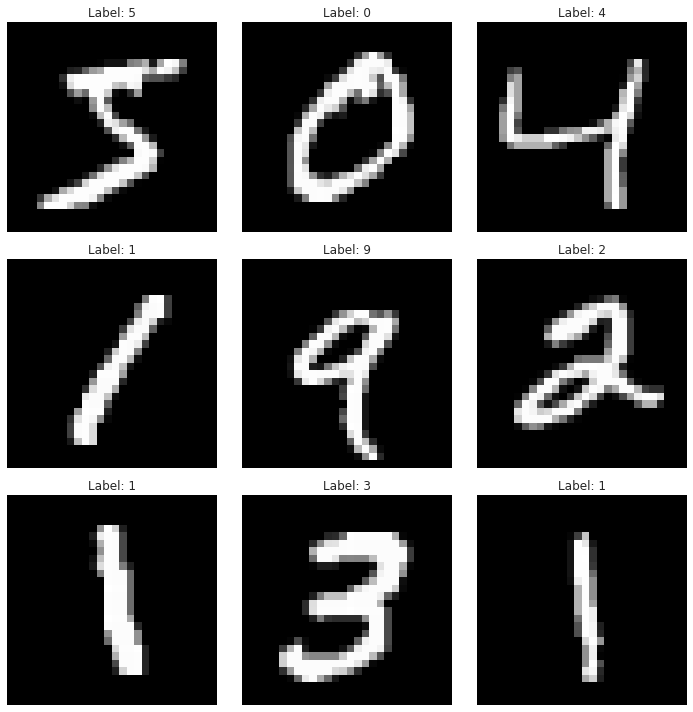

In [7]:
import matplotlib.pyplot as plt
from tensorflow import keras

# Load the MNIST dataset
(x_train, y_train), (_, _) = keras.datasets.mnist.load_data()

# Create a 6x6 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Plot the first 9 images
for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        image_index = i * 3 + j
        ax.imshow(x_train[image_index], cmap='gray')
        ax.set_title(f"Label: {y_train[image_index]}")
        ax.axis('off')

plt.tight_layout()
plt.show()


#### 4.2 **[4pt]** Explain the following lines in the Keras MNIST Tutorial code (in English): 27, 48, 51, 52, 57, 67/77, 68/78, 71

- To answer this question you need to show complete competence, as if you wrote this code yourself and you were asked to explain your choices at an oral exam.
- For each of the lines mentioned, check the code provided and explain it thoroughly
- For each variable, explain its meaning, its use, and the choice of value assigned
- For each function call, explain what it does, the meaning of all parameters, and the choices of all values.
- Reading the code like "assign 12 to variable `epochs`" will not constitute an acceptable answer.
- Reading the code like "creates a new Sequential" is also not acceptable: check the documentation for `Sequential`, understand what the call does, and present your findings.

**Line 27:**
```python
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
```
Explanation:
- This line loads the MNIST dataset from the Keras library.
- The MNIST dataset is a collection of handwritten digits (0-9) commonly used for training and testing machine learning models.
- `keras.datasets.mnist.load_data()` is a function call that retrieves the MNIST dataset from the Keras library.
- The dataset is split into two parts: training data `(x_train, y_train)` and testing data `(x_test, y_test)`.
- `x_train` contains the images of handwritten digits used for training the model, while `y_train` contains the corresponding labels (the actual digit each image represents).
- Similarly, `x_test` contains the images for testing the trained model, and `y_test` contains their corresponding labels.

In summary, line 27 loads the MNIST dataset and splits it into training and testing sets, with images and their corresponding labels for both sets. This dataset will be used to train and evaluate the convolutional neural network model.






**Line 48 initializes a Sequential model in Keras:**

```python
model = keras.Sequential()
```

Explanation:
- In Keras, a Sequential model is a linear stack of layers.
- This line creates an instance of the Sequential model, which will be used to build the convolutional neural network (CNN) for classifying handwritten digits in the MNIST dataset.
- The Sequential model allows us to create neural networks layer by layer in a sequential manner.
- The parentheses `()` are used to instantiate the Sequential model.
- This line initializes an empty Sequential model without any layers added yet.

In summary, line 48 initializes an empty Sequential model, which will be further built by adding layers to define the architecture of the CNN for the MNIST classification task.


**Line 51 adds a 2D convolutional layer to the Sequential model:**

```python
layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
```

Explanation:
- `layers.Conv2D()` is a function call that adds a 2D convolutional layer to the Sequential model.
- This layer is responsible for performing convolution operations on the input data.
- The first parameter `32` specifies the number of filters (or kernels) in the convolutional layer. Each filter detects different features in the input data.
- `kernel_size=(3, 3)` specifies the size of the convolutional kernel. In this case, it is a 3x3 kernel, meaning the convolutional operation will be applied in a 3x3 window over the input data.
- `activation="relu"` sets the activation function for the layer to Rectified Linear Unit (ReLU). ReLU is a commonly used activation function in convolutional neural networks (CNNs) because of its simplicity and effectiveness in introducing non-linearity to the network.

In summary, line 51 adds a 2D convolutional layer to the Sequential model with 32 filters, a 3x3 kernel size, and ReLU activation. This layer is essential for extracting features from the input images during the training process.


**Line 52 adds a MaxPooling2D layer to the Sequential model:**

```python
layers.MaxPooling2D(pool_size=(2, 2)),
```

Explanation:
- `layers.MaxPooling2D()` is a function call that adds a 2D max pooling layer to the Sequential model.
- Max pooling is a downsampling operation commonly used in convolutional neural networks (CNNs) to reduce the spatial dimensions of the feature maps and extract the most important features.
- The `pool_size=(2, 2)` parameter specifies the size of the pooling window. In this case, it is a 2x2 window, meaning the maximum value within each 2x2 window of the input feature maps will be retained, and the rest will be discarded.


In summary, line 52 adds a MaxPooling2D layer to the Sequential model with a 2x2 pooling window. This layer helps reduce the spatial dimensions of the feature maps produced by the convolutional layers, making the model more efficient and robust to variations in the input data.


**Line 57 adds a fully connected Dense layer to the Sequential model:**

```python
layers.Dense(num_classes, activation="softmax"),
```

Explanation:
- `layers.Dense()` is a function call that adds a fully connected dense layer to the Sequential model.
- Dense layers are also known as fully connected layers, where each neuron in the layer is connected to every neuron in the previous layer.
- The first parameter `num_classes` specifies the number of neurons (or units) in the dense layer. In this case, it is set to the number of classes in the classification task, which is 10 for the MNIST dataset (digits 0-9).
- `activation="softmax"` sets the activation function for the layer to Softmax. Softmax activation is commonly used in the output layer of classification models to convert the raw output scores into probability distributions over the different classes. It ensures that the output values are normalized and sum up to 1.

In summary, line 57 adds a fully connected Dense layer to the Sequential model with a Softmax activation function. This layer is responsible for producing the final output probabilities for each class in the classification task.


**Lines 67 and 77 set the batch size for training the model.**

- Line 67 assigns the value `128` to the variable `batch_size`, which represents the number of samples processed at once during training.
- Line 77 uses the `batch_size` parameter in the `model.fit()` function call to specify the batch size for training. By passing the variable `batch_size` as the parameter value, it ensures consistency and flexibility in adjusting the batch size.


**Lines 68 and 78 are related to specifying the number of epochs for training the model using the `model.fit()` function.**

Explanation:
- Line 68 assigns the value `15` to the variable `epochs`, which represents the number of epochs, i.e., the number of times the entire training dataset is passed forward and backward through the neural network during training.
- Line 78, when calling the `model.fit()` function, the `epochs` parameter is set to the value of the variable `epochs` defined earlier. By passing the variable `epochs` as the value for the `epochs` parameter, it specifies the number of training epochs for the model.
- Training a neural network for multiple epochs allows it to learn from the training data progressively and refine its weights to improve performance.
- Setting an appropriate number of epochs is essential for training deep learning models. Too few epochs may result in underfitting, where the model fails to capture the underlying patterns in the data, while too many epochs may lead to overfitting, where the model learns to memorize the training data and performs poorly on unseen data.
- By specifying the number of epochs in both lines 68 and 78, it ensures that the model undergoes training for a fixed number of epochs, allowing it to converge to an optimal solution without overfitting or underfitting.


**Line 71 specifies the loss function used during model compilation, particularly for categorical classification tasks.**

Explanation:
- In line 71, the variable `loss` is assigned the string value `"categorical_crossentropy"`. This indicates that the categorical cross-entropy loss function will be used to compute the loss during training. 
- Categorical cross-entropy is a commonly used loss function for multi-class classification problems where each input sample belongs to one of several classes. It measures the dissimilarity between the true class distributions and the predicted class distributions. For each sample, it computes the cross-entropy loss between the true one-hot encoded class labels and the predicted probabilities output by the model.
- When compiling the model in line 71, the `loss` parameter of the `model.compile()` function is set to the value of the variable `loss`, which is `"categorical_crossentropy"`. This ensures that during training, the model optimizes its weights to minimize the categorical cross-entropy loss.
- Choosing an appropriate loss function is crucial for training deep learning models. The categorical cross-entropy loss is suitable for multi-class classification tasks and is commonly used alongside softmax activation functions in the output layer.
- By specifying the loss function as `"categorical_crossentropy"` in line 71, it ensures that the model is trained to minimize the discrepancy between the predicted class probabilities and the true class labels, leading to improved accuracy on the classification task.


#### 4.3 **[2pt]** Run Keras MNIST code, tweaking it as needed if it takes too long on your machine. Plot the model's accuracy and loss over time.

- This is almost for free since you did the same visualization last week, but you need to get the code to run first.
- Also you may want to make sure your changes include setting 'accuracy' and the `history` variable, or at the end of the run you could end up with still nothing to show :)

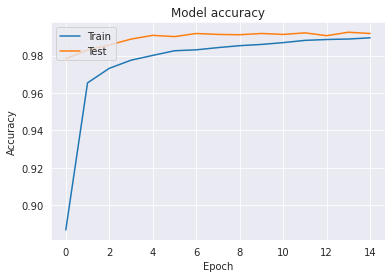

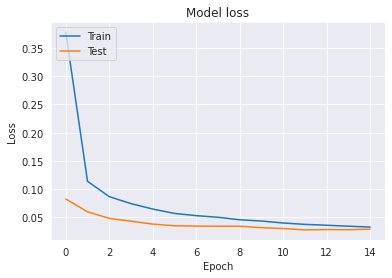

In [8]:
for idx, metric in enumerate(['accuracy', 'loss']):
    plt.figure(idx)
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.title('Model ' + metric)
    plt.ylabel(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


# At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

#### BONUS **[ZERO pt]** Edit the Keras MNIST code to use a simple RNN, then cheat by passing all images of a class in a sequence (careful with batch size). Reset the network between classes. RNNs will recognize that you expect a constant output per each sequence, decide which output with the first few images, then just saturate the right neurons using the recurrent connections to generate a constant output regardless of the input. You can verify this by then testing the network on a sequence of elements from a constant class, followed by one (or more) elements from another class: they will likely be misclassified. All intelligent learning picks up on shortcuts whenever available, here is a famous example (check the full paper): [husky vs. wolf](https://www.researchgate.net/figure/A-husky-on-the-left-is-confused-with-a-wolf-because-the-pixels-on-the-right_fig1_329277474). Notice that getting a "simple" RNN in Keras is not straightforward.

### Final considerations

- At the end of this lecture + exercise you should _own_ neural networks. It does not mean that you know everything about them, but you know enough to understand any resource on the topic, and actually understand how these things work better than most people who just use Keras/Pytorch on a daily basis (unfortunately).